### Importing Neccessary Libraries

In [73]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score,ConfusionMatrixDisplay,mean_squared_error, r2_score

### Import the Data

DATA SOURCE: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

In [74]:
data=pd.read_csv('customer_churn_dataset-training-master.csv',parse_dates=True) #Read in the Data

In [75]:
df=data.copy() #Have a copy of the data

In [76]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

### Data Description
1. CustomerID -A unique identifier for each customer.
2. Age- The age of the customer.
3. Gender- The gender of the customer (e.g., Male, Female).
4. Tenure- The number of months the customer has been with the company.
5. Usage Frequency - The average number of interactions or services used by the customer per month.
6. Support Calls- The number of support calls made by the customer in the last 6 months.
7. Payment Delay- The number of times the customer delayed their payment in the last year.
8. Subscription Type- The type of subscription the customer is using (e.g., Basic, Premium, Family).
9. Contract Length- The length of the contract between the customer and the company (e.g., Monthly, Quarterly,Annualy).
10. Total Spend- The total amount of money spent by the customer during their tenure.
11. Last Interaction-nThe number of days since the customer's last interaction with the service.
12. Churn-Indicates whether the customer has churned (left the service) or not.


In [77]:
df.head() # Have a view into our data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


### Data Description

In [78]:
print("This data has {} columns and {} rows".format(df.shape[1],df.shape[0])) # Data Description

This data has 12 columns and 440833 rows


In [79]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [80]:
df.dtypes #Checking our data types

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

### Data Cleaning

In [81]:
df.isnull().sum()  #Checking Null value

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [82]:
df[df.isnull().any(axis=1)]  #Having a view into the null values

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The row above has all it columns empty so we would have to drop it 

In [83]:
df.dropna(inplace=True)      #Dropping the null values

In [84]:
df['Gender'].nunique() #Checking the category of genders we have

2

In [85]:
df['Gender'].value_counts()    #Checking the value counts of gender

Gender
Male      250252
Female    190580
Name: count, dtype: int64

In [86]:
df['Subscription Type'].value_counts() #Checking the value counts of Subscription Type

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [87]:
df['Contract Length'].value_counts() #Checking the value counts of Contract Length

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [88]:
df['Churn'].value_counts() #Checking the value counts of Customers who churned

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

### Exploratory Data Analysis

### Visualizing the count of Churn to detet imbalance

<Axes: xlabel='Churn', ylabel='count'>

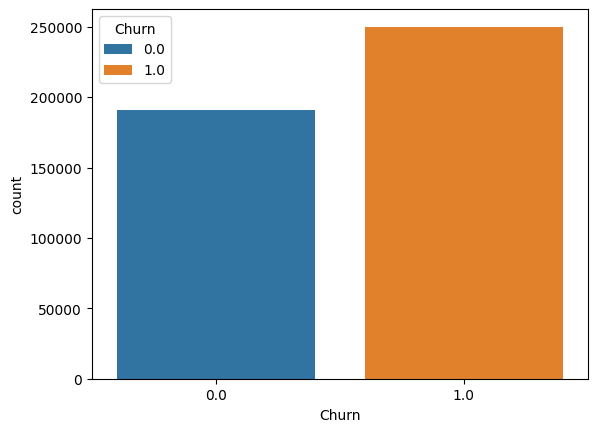

In [89]:
sns.countplot(x='Churn',data=df,hue='Churn')

### Distribution of Contract Length with Churn Status

<Axes: xlabel='Contract Length', ylabel='count'>

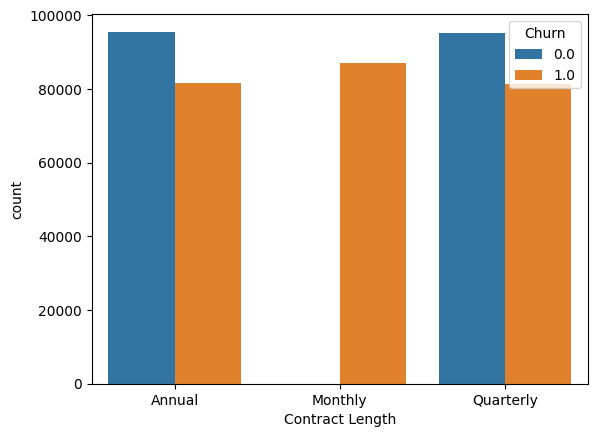

In [90]:
sns.countplot(x='Contract Length',data=df,hue='Churn')

### Churn Distribution by Gender

<Axes: xlabel='Churn', ylabel='count'>

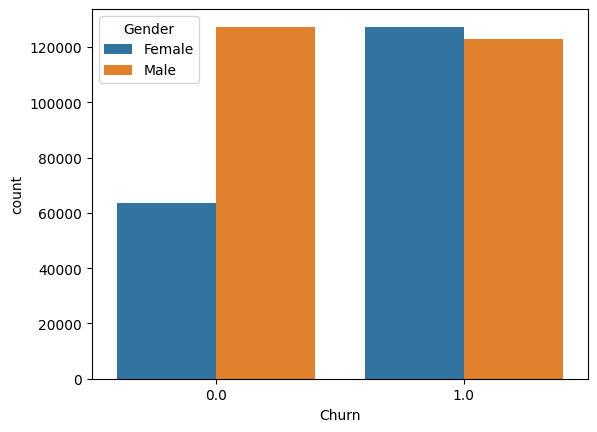

In [91]:
sns.countplot(x='Churn',data=df,hue='Gender')

### Subscription Type Distribution by Gender

<Axes: xlabel='Subscription Type', ylabel='count'>

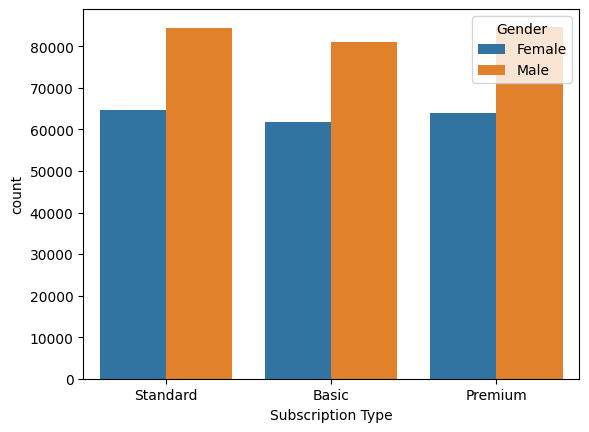

In [92]:
sns.countplot(x='Subscription Type',data=df,hue='Gender')

### Age Distribution with KDE

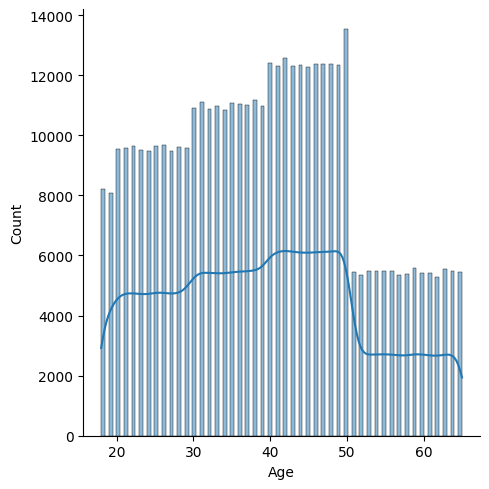

In [93]:
sns.displot(x='Age',data=df,kde=True)

### Tenure Distribution with KDE

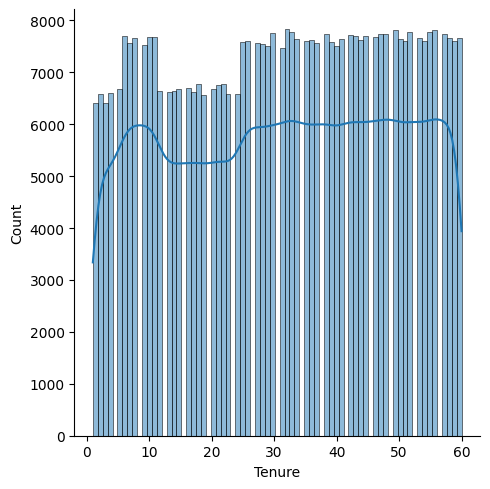

In [94]:
sns.displot(x='Tenure',data=df,kde=True)

### Last Interaction Distribution with KDE

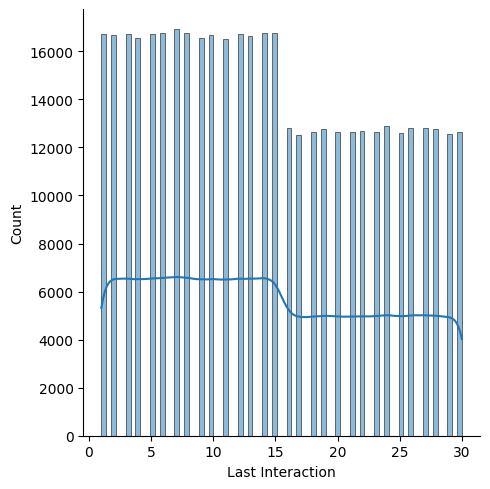

In [95]:
sns.displot(x='Last Interaction',data=df,kde=True)

In [96]:


def plot_normality_check(data, column_name=None, figsize=(12, 8)):
    """
    This is to comprehensive plot to check if the data is normally distributed or skewed.
    
    Parameters:
    - data: pandas Series or numpy array
    - column_name: str, name of the column (optional, for labeling purposes)
    - figsize: tuple, size of the figure (width, height)
    
    Returns:
    - None (displays the plot and prints skewness)
    """
    if isinstance(data, pd.DataFrame):
        raise ValueError("Please provide a pandas Series or numpy array, not a DataFrame.")
    
    if isinstance(data, pd.Series):
        column_name = data.name if column_name is None else column_name
        data = data.dropna().values
    else:
        data = data[~np.isnan(data)]
    
    # check skewness
    skewness = stats.skew(data)
    
    # Create the plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f"Normality Check for {column_name if column_name else 'Data'}", fontsize=16)
    
    # Histogram with KDE
    sns.histplot(data=data, kde=True, ax=ax1)
    ax1.set_title('Histogram with KDE')
    if column_name:
        ax1.set_xlabel(column_name)
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')
    
    # Box plot
    sns.boxplot(x=data, ax=ax3)
    ax3.set_title('Box Plot')
    
    # Violin plot
    sns.violinplot(x=data, ax=ax4)
    ax4.set_title('Violin Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Print skewness
    print(f"Skewness: {skewness:.4f}")
    if abs(skewness) < 0.5:
        print("The data is approximately symmetric.")
    elif abs(skewness) < 1:
        print("The data is moderately skewed.")
    else:
        print("The data is highly skewed.")
    print(f"Direction: {'Positive' if skewness > 0 else 'Negative'} skew ({'right' if skewness > 0 else 'left'}-tailed)")



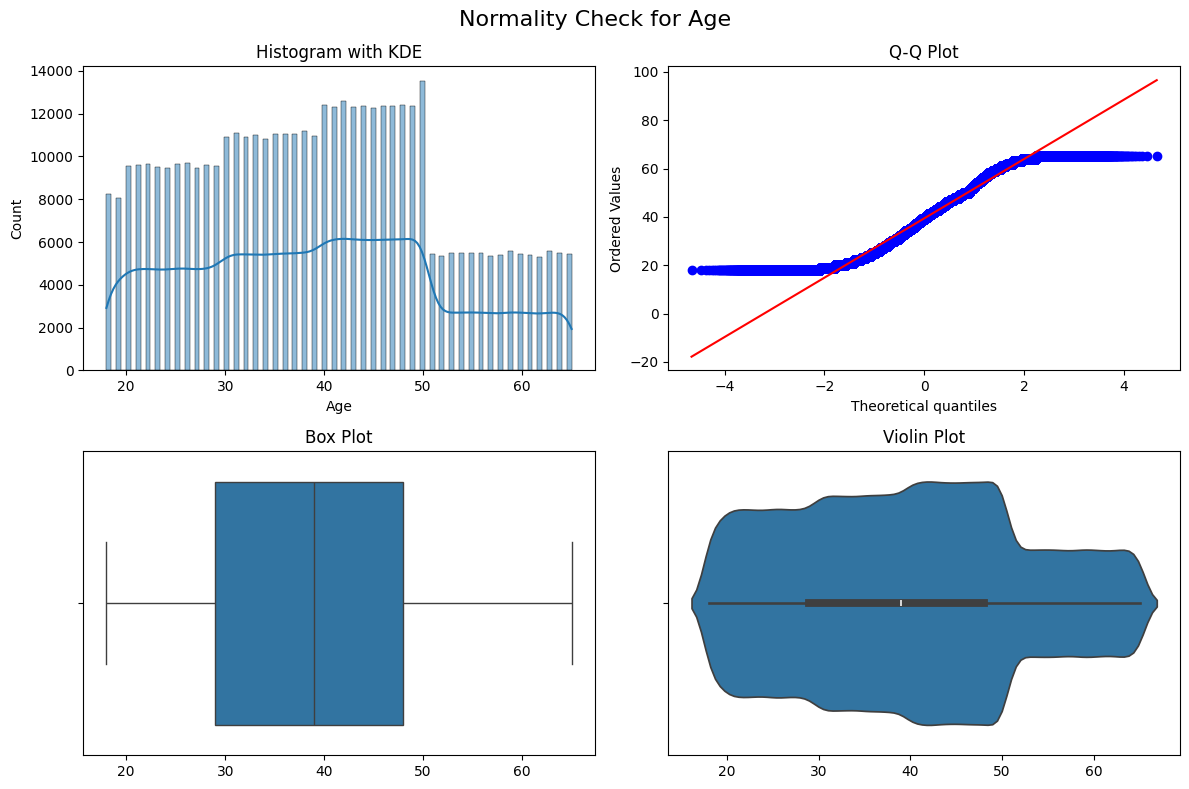

Skewness: 0.1620
The data is approximately symmetric.
Direction: Positive skew (right-tailed)


In [97]:
plot_normality_check(df['Age'])

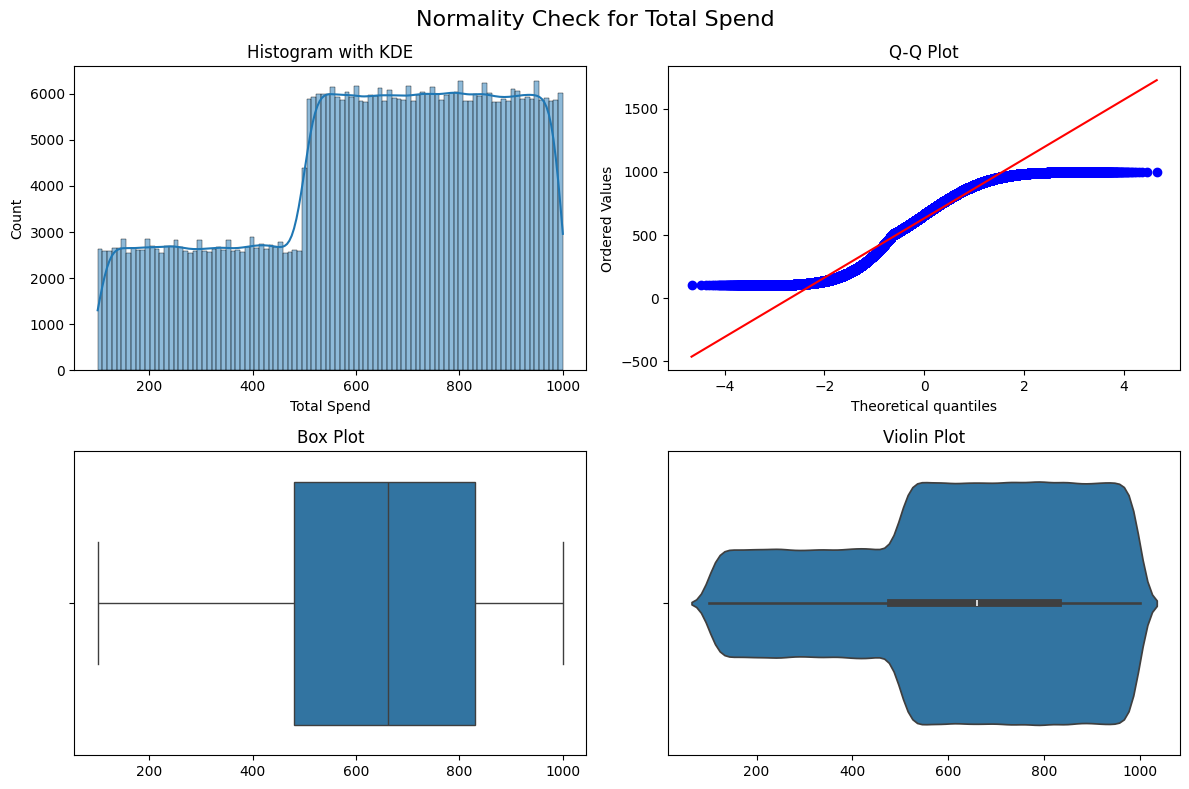

Skewness: -0.4572
The data is approximately symmetric.
Direction: Negative skew (left-tailed)


In [98]:
plot_normality_check(df['Total Spend'])

### Sampling

In [99]:
# Separate the Churn Classes classes
class_0 = df[df['Churn'] == 0.0]  # Non-Churn
class_1 = df[df['Churn'] == 1.0]  # Churn

# Randomly sample 10,000 from each churn class
class_0_sample = class_0.sample(n=10000, random_state=42)
class_1_sample = class_1.sample(n=10000, random_state=42)

# Concatenate the two samples to form a balanced dataset
df= pd.concat([class_0_sample, class_1_sample])

# Shuffle the dataset to mix the classes
df= df.sample(frac=1, random_state=42).reset_index(drop=True)

### Feature Engineering

### One Hot Encoding for Categorical Columns

In [100]:
# Assuming df is already defined
columns_to_encode = ['Gender', 'Subscription Type', 'Contract Length']

# Create OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False)


In [101]:
# Apply encoder to the selected columns
encoded_columns = encoder.fit_transform(df[columns_to_encode])

In [102]:
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

In [103]:
encoded_df.head()

,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [104]:
# Concatenate the encoded columns back to the original DataFrame (drop the original encoded columns)
df= pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

In [105]:
df.shape

(20000, 17)

In [106]:
df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1235.0,56.0,58.0,19.0,10.0,17.0,547.00,27.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,305796.0,49.0,10.0,21.0,1.0,16.0,621.23,10.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,445382.0,37.0,57.0,10.0,0.0,2.0,897.00,26.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,351057.0,20.0,56.0,11.0,2.0,6.0,796.66,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,15434.0,58.0,15.0,22.0,10.0,20.0,967.00,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [107]:
df.drop(columns=['CustomerID'],inplace =True)

In [108]:
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']


### Picking my Features and Labels

In [109]:
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
df.dtypes

Age                           float64
Tenure                        float64
Usage Frequency               float64
Support Calls                 float64
Payment Delay                 float64
Total Spend                   float64
Last Interaction              float64
Churn                         float64
Gender_Female                 float64
Gender_Male                   float64
Subscription Type_Basic       float64
Subscription Type_Premium     float64
Subscription Type_Standard    float64
Contract Length_Annual        float64
Contract Length_Monthly       float64
Contract Length_Quarterly     float64
dtype: object

In [111]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Train SVM Model and Evaluate

In [113]:

# Function to train SVC model, evaluate and plot ROC curve
def train_and_evaluate_svc(X_train, y_train, X_test, y_test):
    # Initialize the SVC model
    svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

    # Fit the model to the training data
    svc_model.fit(X_train, y_train)

    # Save the SVC model to a .pkl file
    joblib.dump(svc_model, 'svc_model.pkl')
    print("SVC model saved as 'svc_model.pkl'")

    # Predict probabilities and labels for the test data
    y_pred_proba = svc_model.predict_proba(X_test)[:, 1]
    y_pred = svc_model.predict(X_test)

    # Compute ROC curve and ROC AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plot_roc_curve(fpr, tpr, roc_auc, 'SVC')

    # Print classification report and confusion matrix
    print("SVC Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\nSVC Accuracy Score:", accuracy_score(y_test, y_pred))

    # Plot confusion matrix for SVC
    plot_confusion_matrix(y_test, y_pred, "SVC Confusion Matrix")

    #Feature Importance
    feature_names = X_train.columns
    result = permutation_importance(svc_model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
    plot_feature_importance(result.importances_mean, feature_names, "SVC Feature Importance (Permutation Importance)")

    print(f"SVC ROC AUC Score: {roc_auc:.2f}\n")

### Train KNN Model and Evaluate

In [114]:
# Function to train and evaluate KNN model
def train_and_evaluate_knn(X_train, y_train, X_test, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # Predict probabilities and labels for the test data
    knn_y_pred = knn_model.predict(X_test)
    knn_y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC AUC score
    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_y_pred_proba)
    roc_auc_knn = roc_auc_score(y_test, knn_y_pred_proba)

    # Plot ROC curve
    plot_roc_curve(fpr_knn, tpr_knn, roc_auc_knn, 'KNN')

    # Print classification report and confusion matrix
    print("KNN Classification Report:")
    print(classification_report(y_test, knn_y_pred))
    print("\nKNN Accuracy Score:", accuracy_score(y_test, knn_y_pred))

    # Plot confusion matrix for KNN
    plot_confusion_matrix(y_test, knn_y_pred, "KNN Confusion Matrix")

    print(f"KNN ROC AUC Score: {roc_auc_knn:.2f}\n")


### Train Logistic Regression  and Evaluate

In [115]:
# Function to train and evaluate Logistic Regression model
def train_and_evaluate_logreg(X_train, y_train, X_test, y_test):
    logreg_model = LogisticRegression(solver='liblinear', random_state=42)
    logreg_model.fit(X_train, y_train)

    # Predict probabilities and labels for the test data
    logreg_y_pred = logreg_model.predict(X_test)
    logreg_y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC AUC score
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_y_pred_proba)
    roc_auc_logreg = roc_auc_score(y_test, logreg_y_pred_proba)

    # Plot ROC curve
    plot_roc_curve(fpr_logreg, tpr_logreg, roc_auc_logreg, 'Logistic Regression')

    # Print classification report and confusion matrix
    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, logreg_y_pred))
    print("\nLogistic Regression Accuracy Score:", accuracy_score(y_test, logreg_y_pred))

    # Plot confusion matrix for Logistic Regression
    plot_confusion_matrix(y_test, logreg_y_pred, "Logistic Regression Confusion Matrix")

    print(f"Logistic Regression ROC AUC Score: {roc_auc_logreg:.2f}\n")


### Plotting ROC curve

In [116]:
# Function to plot the ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal for random classifier
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


### Plot the confusion Matrix

In [117]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

### Plot the Feature Importance

In [118]:
def plot_feature_importance(importances, feature_names, title):
    # Sort features by importance
    indices = np.argsort(importances)
    sorted_importances = importances[indices]
    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(title)
    plt.show()


In [119]:

# Function to train and evaluate all models
def train_and_evaluate_all(X_train, y_train, X_test, y_test):
    # Train and evaluate SVC
    train_and_evaluate_svc(X_train, y_train, X_test, y_test)

    # Train and evaluate KNN
    train_and_evaluate_knn(X_train, y_train, X_test, y_test)

    # Train and evaluate Logistic Regression
    train_and_evaluate_logreg(X_train, y_train, X_test, y_test)

SVC model saved as 'svc_model.pkl'


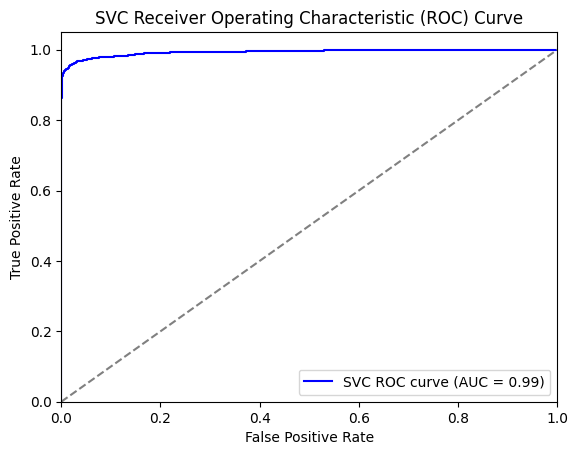

SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2055
         1.0       0.99      0.94      0.97      1945

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000


SVC Accuracy Score: 0.96775


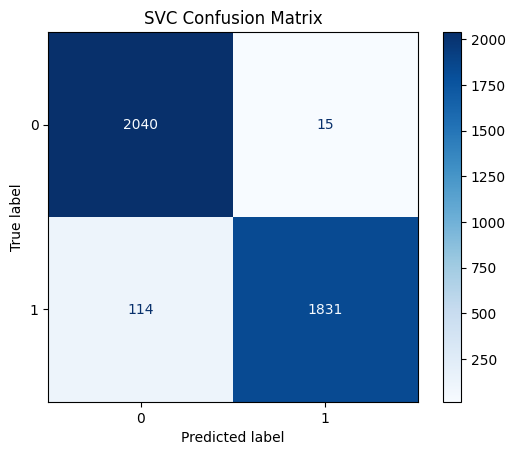

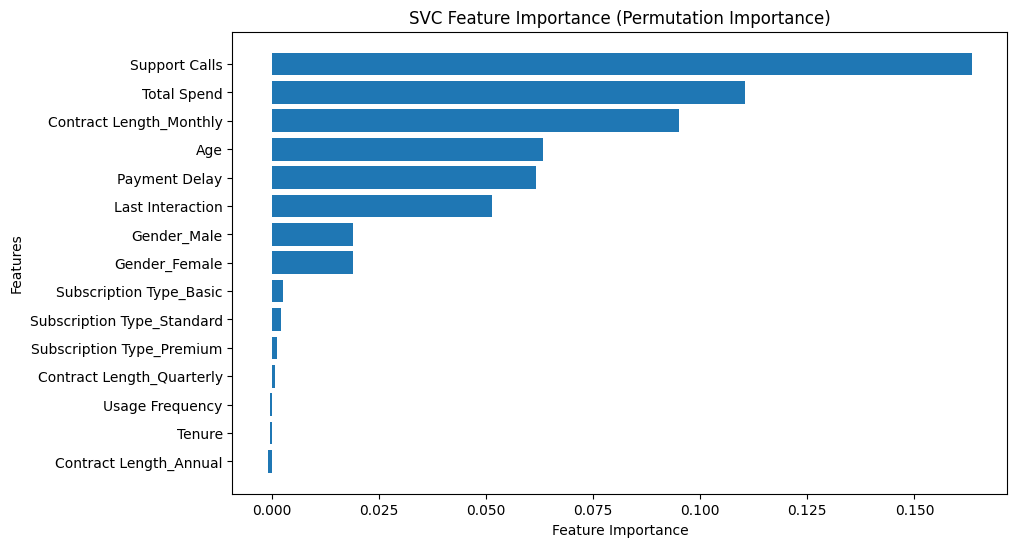

SVC ROC AUC Score: 0.99



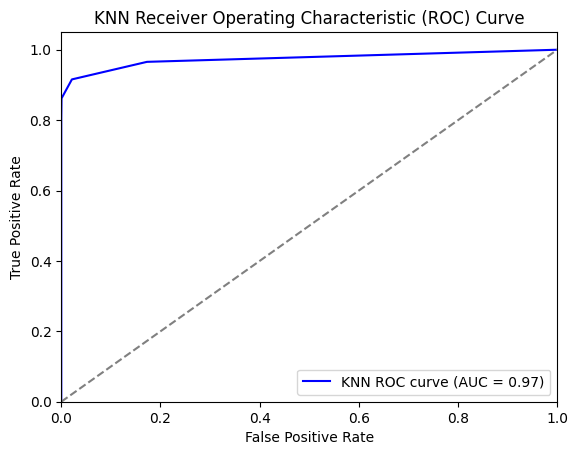

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      2055
         1.0       1.00      0.86      0.93      1945

    accuracy                           0.93      4000
   macro avg       0.94      0.93      0.93      4000
weighted avg       0.94      0.93      0.93      4000


KNN Accuracy Score: 0.9325


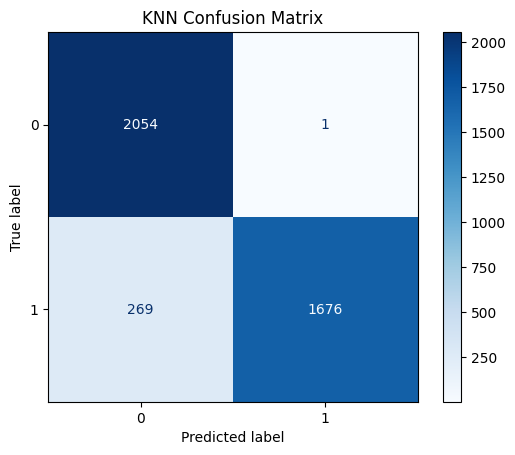

KNN ROC AUC Score: 0.97



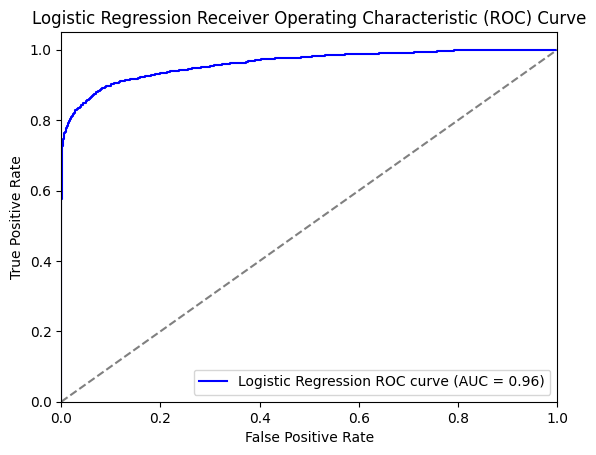

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2055
         1.0       0.93      0.87      0.90      1945

    accuracy                           0.90      4000
   macro avg       0.91      0.90      0.90      4000
weighted avg       0.91      0.90      0.90      4000


Logistic Regression Accuracy Score: 0.9035


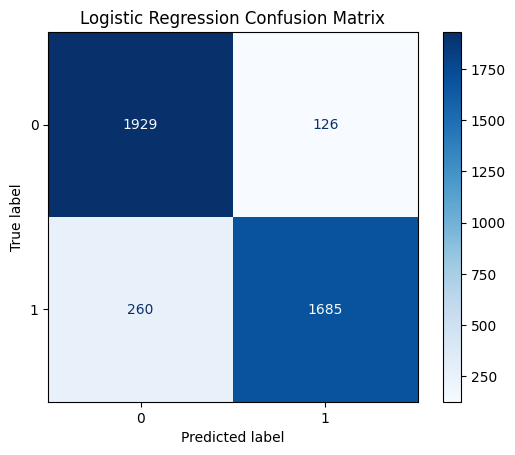

Logistic Regression ROC AUC Score: 0.96



In [120]:
train_and_evaluate_all(X_train, y_train, X_test, y_test)

### Regression

In [121]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,56.0,58.0,19.0,10.0,17.0,547.00,27.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,49.0,10.0,21.0,1.0,16.0,621.23,10.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,37.0,57.0,10.0,0.0,2.0,897.00,26.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,20.0,56.0,11.0,2.0,6.0,796.66,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,58.0,15.0,22.0,10.0,20.0,967.00,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [122]:
# Features (X) and target (y)
X = df.drop(columns=['Total Spend'])  # Feature 
y = df['Total Spend']  # Total Spend

In [123]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# Initialize the Support Vector Regressor
svr = SVR(kernel='rbf')  

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

In [ ]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [ ]:
# Print the results
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")

Train MSE: 46481.22
Test MSE: 47216.74
Train R2: 0.17
Test R2: 0.16
